In [1]:
import cv2
import numpy as np

In [2]:
haar_data= cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [5]:
capture=cv2.VideoCapture(0)
data=[]
while True:
    flag, img = capture.read()
    if flag is True:
        faces  = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h), (255,0,0), 4)
            face= img[y:y+h, x:x+w, :]
            face= cv2.resize(face,(50,50))
            print(len(data))
            data.append(face)
        cv2.imshow('result', img)
        if cv2.waitKey(2)== 27 or len(data)>=200:
            break
            
capture.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [4]:
while True:
    cv2.imshow('result', data[0])
    if cv2.waitKey(20)== 27:
        break
capture.release()
cv2.destroyAllWindows()

In [ ]:
# while True:
#     isTrue, frame= capture.read()
#     cv.imshow('video',data[0])
    
#     if cv.waitKey(20) & 0xFF==ord('d'):
#         break
        
        
# capture.release()
# cv.destroyAllWindows()
    

In [6]:
capture=cv2.VideoCapture(0)
data_mask=[]
while True: 
    flag, img = capture.read()
    if flag is True:
        faces  = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h), (255,0,0), 4)
            face= img[y:y+h, x:x+w, :]
            face= cv2.resize(face,(50,50))
            print(len(data_mask))
            data_mask.append(face)
        cv2.imshow('result', img)
        if cv2.waitKey(2)== 27 or len(data_mask)>=200:
            break
            
capture.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [7]:
data=np.array(data)

In [8]:
data.shape

(200, 50, 50, 3)

In [7]:
#np.save('mask.npy',data)

In [8]:
# no_mask= np.load('no_mask.npy')
# mask=np.load('mask.npy')


In [9]:
# pic_dict={'no_mask':data,'mask':data_mask}
# pic_class={'no_mask':0,'mask':1}

In [9]:
x=np.r_[data,data_mask]

In [11]:
x.shape

(400, 50, 50, 3)

In [10]:
labels= np.zeros(x.shape[0]) 

In [11]:
labels[200:]=1.0

In [12]:
labels.shape

(400,)

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,labels, test_size=0.30)

In [16]:
xtrain

array([[[[255,   0,   0],
         [255,   0,   0],
         [255,   0,   0],
         ...,
         [255,   0,   0],
         [255,   0,   0],
         [255,   0,   0]],

        [[255,   0,   0],
         [ 21,  19,  25],
         [ 24,  22,  28],
         ...,
         [ 83,  81,  87],
         [129, 130, 131],
         [232, 218, 219]],

        [[255,   0,   0],
         [ 22,  20,  26],
         [ 21,  22,  28],
         ...,
         [ 72,  77,  79],
         [129, 128, 128],
         [233, 219, 220]],

        ...,

        [[255,   0,   0],
         [ 43,  28,  28],
         [ 57,  43,  36],
         ...,
         [111, 114, 110],
         [ 91,  84,  73],
         [138, 105,  96]],

        [[255,   0,   0],
         [ 67,  47,  46],
         [116, 105, 100],
         ...,
         [128, 132, 126],
         [127, 129, 123],
         [147, 111, 110]],

        [[255,   0,   0],
         [163, 140, 140],
         [158, 140, 137],
         ...,
         [143, 114, 107],
        

In [17]:
# for i in pic_dict:
#     #print(i)
#     pic_name=i
#     pic_path_list=pic_dict[pic_name]
#     print(pic_path_list)
#   #print(pic_path)
#     for path in pic_path_list:
#         img=cv2.imread(str(path))
#         img = cv2.resize(img,(100,100))
#         img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#         img = img/255 #no rmalization
#         x.append(img)
#         y.append(pic_class[i])

[[[[255   0   0]
   [255   0   0]
   [255   0   0]
   ...
   [255   0   0]
   [255   0   0]
   [255   0   0]]

  [[255   0   0]
   [ 20  19  23]
   [ 20  18  22]
   ...
   [173 182 182]
   [106  89  96]
   [161  45  47]]

  [[255   0   0]
   [ 22  21  25]
   [ 20  21  24]
   ...
   [168 184 184]
   [110  99 105]
   [160  43  47]]

  ...

  [[255   0   0]
   [ 32  32  28]
   [ 36  31  30]
   ...
   [133 127 119]
   [142 131 124]
   [194  89  88]]

  [[255   0   0]
   [ 33  32  29]
   [ 37  33  32]
   ...
   [149 144 130]
   [141 139 130]
   [196  90  89]]

  [[255   0   0]
   [132  19  20]
   [131  19  19]
   ...
   [220 113 110]
   [213 109 105]
   [222  52  50]]]


 [[[255   0   0]
   [255   0   0]
   [255   0   0]
   ...
   [255   0   0]
   [255   0   0]
   [255   0   0]]

  [[255   0   0]
   [ 42  39  48]
   [ 41  38  47]
   ...
   [244 254 254]
   [221 236 234]
   [199  89  90]]

  [[255   0   0]
   [ 43  39  48]
   [ 45  43  50]
   ...
   [248 255 254]
   [226 236 236]
   [202  89

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [14]:
data_mask=np.array(data_mask)

In [15]:
data_mask.shape

(200, 50, 50, 3)

In [19]:
np.save('no_mask.npy',data)
np.save('mask.npy',data_mask)

In [20]:
with_mask=np.load('mask.npy')
without_mask=np.load('no_mask.npy')

In [21]:
with_mask

array([[[[255,   0,   0],
         [253,   0,   0],
         [253,   0,   0],
         ...,
         [254,   2,   2],
         [254,   2,   2],
         [254,   2,   2]],

        [[253,   0,   0],
         [ 13,  13,  13],
         [ 14,  13,  15],
         ...,
         [172, 189, 188],
         [173, 187, 190],
         [170, 185, 188]],

        [[253,   0,   0],
         [ 13,  13,  13],
         [ 15,  14,  16],
         ...,
         [164, 190, 190],
         [174, 185, 189],
         [170, 182, 186]],

        ...,

        [[253,   0,   0],
         [ 65,  50,  45],
         [121, 112,  99],
         ...,
         [ 38,  28,  21],
         [ 39,  28,  24],
         [ 42,  28,  26]],

        [[254,   1,   1],
         [153, 153, 150],
         [141, 142, 140],
         ...,
         [ 91,  82,  75],
         [105,  94,  86],
         [ 88,  84,  76]],

        [[254,   1,   1],
         [150, 144, 144],
         [141, 139, 135],
         ...,
         [107,  97,  96],
        

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [17]:
model = Sequential()

model.add(Conv2D(filters=80, kernel_size=(3,3),input_shape=(50,50,3),padding='valid',strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=30, kernel_size=(3,3),padding='valid',strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))



model.add(Flatten())

model.add(Dense(100,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(30,activation='relu'))

model.add(Dense(2,activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 80)        2240      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 80)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 30)        21630     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 30)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3630)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [18]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [19]:
hist = model.fit(xtrain,ytrain,batch_size=5,epochs=5,validation_data=(xtest,ytest))

Epoch 1/5
56/56 [==============================] - 9s 114ms/step - loss: 3.4652 - accuracy: 0.8143 - val_loss: 0.0504 - val_accuracy: 0.9833
Epoch 2/5
56/56 [==============================] - 6s 98ms/step - loss: 0.1103 - accuracy: 0.9679 - val_loss: 0.0188 - val_accuracy: 0.9917
Epoch 3/5
56/56 [==============================] - 6s 99ms/step - loss: 0.0606 - accuracy: 0.9786 - val_loss: 0.0733 - val_accuracy: 0.9667
Epoch 4/5
56/56 [==============================] - 6s 99ms/step - loss: 0.3691 - accuracy: 0.9286 - val_loss: 0.1907 - val_accuracy: 0.9667
Epoch 5/5
56/56 [==============================] - 5s 97ms/step - loss: 0.0973 - accuracy: 0.9607 - val_loss: 0.0513 - val_accuracy: 0.9833


In [20]:
history=hist.history

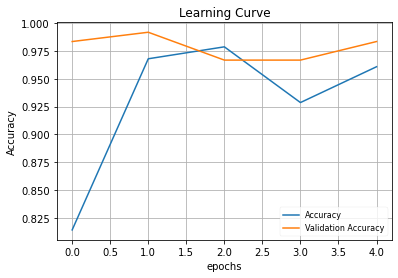

In [21]:
import matplotlib.pyplot as plt
plt.title('Learning Curve')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.plot(history['accuracy'],label=('Accuracy'))
plt.plot(history['val_accuracy'],label=('Validation Accuracy'))
plt.grid(True)
plt.style.use('seaborn-paper')
# plt.show()
plt.legend()

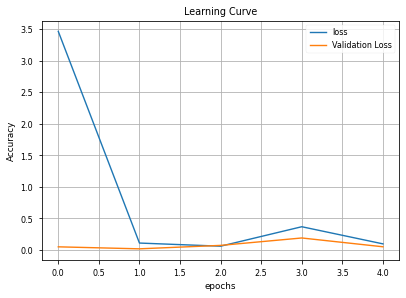

In [22]:
plt.title('Learning Curve')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.plot(history['loss'],label=('loss'))
plt.plot(history['val_loss'],label=('Validation Loss'))
plt.grid(True)
plt.style.use('seaborn-paper')
# plt.show()
plt.legend()

In [23]:
#hcc = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
capture=cv2.VideoCapture(0)
names= {0: 'No_Mask', 1:'Mask'}
while True:
    flag, img = capture.read()
    if flag is True:
        faces  = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h), (255,0,0), 4)
            face= img[y:y+h, x:x+w, :]
            face= cv2.resize(face,(50,50))
            face=face.reshape(1,50,50,3)
            pred= model.predict(face)
            label=np.argmax(pred, axis=1)[0]
            cv2.putText(img, names[label], (x,y), cv2.FONT_HERSHEY_SIMPLEX,.7, (0,255,0), 2)
            #n= names[int(pred)]
            
        cv2.imshow('result', img)
        if cv2.waitKey(2)== 27:
            break
            
capture.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 69ms/step
